# Use the BRO REST service for retrieving groundwater heads data

In the Netherlands, over 80.000 groundwater monitoring wells have been installed since the end of the 19th century. Since 2020 measurements from groundwater wells are stored in a national database that is referred to as the BRO. Data can be downloaded from a webportal and data are available thorugh a REST service. This notbook demonstrates functionality in Acequia to retrieve data using the REST service. The python package Request has to be installed on your computer.  

BRO REST functionality is available in Acequia in functions available in the module brorest. Let's import all nessecary packages en show all methods and attributes of brorest:


In [1]:
from acequia import brorest
import acequia as aq

In [2]:
dir(brorest)

['BroGldXml',
 'DataFrame',
 'ET',
 'Series',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_parse_dispatchDocument',
 'dt',
 'get_area_wellprops',
 'get_gld_codes',
 'get_gmw_codes',
 'get_levels',
 'get_putcode',
 'get_wellprops',
 'get_welltubes',
 'pd',
 'requests']

## Retrieve all groundwater wells within an area  

In the following examples we explore groundwater wells in the nature reserve Agelerbroek. The governmental organisation provincie Overijssel is responsible for protecting this nature reserve under European Natura2000 legislation. Monitoring groundwater levels is part of the responsibility.  

First we list all groundwater wells within a specifica area. Either a circle or a rectangle can be used to define the area:

In [17]:
wells = brorest.get_area_wellprops(center=(52.386449,6.919354),radius=0.250,startdate='2009-01-01')
wells

,GMW_C,broId,deregistered,deliveryAccountableParty,qualityRegime,objectRegistrationTime,latestCorrectionTime,underReview,standardizedLocation,pos,...,wellHeadProtector,nitgCode,wellCode,statusOverview,diameterRange,smallestTubeTopDiameter,largestTubeTopDiameter,screenPositionRange,BRO_DO,deregistrationTime
0,NaN,GMW000000013875,nee,51048329,IMBRO/A,2019-09-12T11:08:42+02:00,2022-07-06T09:05:15+02:00,nee,NaN,259339.000 489589.000,...,kokerNietMetaal,B28F1508,GMW28F001508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,GMW000000041074,nee,51048329,IMBRO/A,2020-12-17T16:53:46+01:00,2022-07-05T10:09:37+02:00,nee,NaN,259326.100 490049.180,...,kokerNietMetaal,B28F1566,GMW28F001566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,GMW000000020103,ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-04T11:51:34+01:00


In [18]:
wells_rect = brorest.get_area_wellprops(lowerleft=(52.381090,6.912511),upperright=(52.391271,6.924919),startdate='2009-01-01')

## Get well properties and measured heads

In the previous result, the column "broId" contains the unique identifier of a groundwater well. Let's retrieve the well properties,

In [30]:
brorest.get_wellprops('GMW000000013875')

,GMW_PPO,broId,deliveryAccountableParty,qualityRegime,withPrehistory,deliveryContext,constructionStandard,initialFunction,removed,numberOfMonitoringTubes,...,materialUsed,tubePackingMaterial,tubeMaterial,glue,screen,screenLength,sockMaterial,screenTopPosition,screenBottomPosition,plainTubePart
0,None,GMW000000013875,51048329,IMBRO/A,ja,publiekeTaak,geen,stand,nee,3,...,None,boorgatmateriaal,pvc,geen,None,0.500,geen,16.190,15.690,None


This groundwater well contains three monitoring tubes. The measured head serie for a piezometer can be retrieved with it's unique identifier. Let's show the piezometers for well GMW000000013875 and plot the measured heads for one of them:

In [31]:
brorest.get_welltubes('GMW000000013875')

,gmwid,tubenr,gldid,instantie
0,GMW000000013875,1,GLD000000012658,51048329
1,GMW000000013875,3,GLD000000012656,51048329
2,GMW000000013875,2,GLD000000012659,51048329


In [36]:
lev3 = brorest.get_levels('GLD000000012659')

d:\thomas\datascience\github-mijnwerk\acequia-package\acequia\acequia\read\brogldxml.py:275: UserWarning: Duplicate datetimes found in head series GLD000000012659.
  warnings.warn(f'Duplicate datetimes found in head series {name}.')


<AxesSubplot: xlabel='time'>

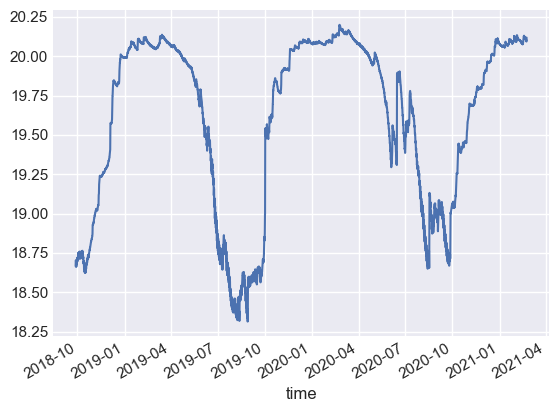

In [37]:
lev3.heads.plot()

The heads are stored in lev3, which is an object of the class "BroGldXml" that Acequia uses to read and store the XML tree of BRO groundwater head data. This class has several properties with details of the measured groundwater head timeseries and the measurment proces:

In [42]:
lev3.gldprops

dispatchTime                2023-02-05T18:44:51+01:00
broIdGld                              GLD000000012659
deliveryAccountableParty                     51048329
qualityRegime                                 IMBRO/A
objectRegistrationTime      2022-02-15T11:59:02+01:00
registrationStatus                          aangevuld
latestAdditionTime          2022-05-25T12:33:25+02:00
corrected                                         nee
underReview                                       nee
deregistered                                      nee
reregistered                                      nee
researchFirstDate                          2018-09-27
researchLastDate                           2021-02-22
broIdGmw                              GMW000000013875
tubeNumber                                          2
Name: GldProperties, dtype: object

In [41]:
lev3.procesprops

,proces,parameter,value
0,201175,AirPressureCompensationType,putlocatiemeting
1,201175,EvaluationProcedure,oordeelDeskundige
2,201175,MeasurementInstrumentType,druksensor
3,202290,AirPressureCompensationType,putlocatiemeting
4,202290,EvaluationProcedure,oordeelDeskundige
5,202290,MeasurementInstrumentType,druksensor
6,211898,EvaluationProcedure,oordeelDeskundige
7,211898,MeasurementInstrumentType,elektronischPeilklokje
8,211899,EvaluationProcedure,oordeelDeskundige
9,211899,MeasurementInstrumentType,elektronischPeilklokje


In [44]:
lev3.obsprops

,obsId,obsRole,dataStamp
0,201175,principalInvestigator,2020-01-18
1,202290,principalInvestigator,2021-02-22
2,211898,principalInvestigator,2018-09-27
3,211899,principalInvestigator,2019-09-11
4,211900,principalInvestigator,2021-02-22
5,197367,principalInvestigator,2018-11-28


In [46]:
lev3.obs

,time,value,quality,timeseries
0,2018-09-27T09:57:00+02:00,18.701,goedgekeurd,211898
1,2018-09-27T12:00:00+02:00,18.700,goedgekeurd,197367
2,2018-09-27T13:00:00+02:00,18.691,goedgekeurd,197367
3,2018-09-27T14:00:00+02:00,18.683,goedgekeurd,197367
4,2018-09-27T15:00:00+02:00,18.676,goedgekeurd,197367
...,...,...,...,...
21103,2021-02-22T11:00:00+01:00,20.098,goedgekeurd,202290
21104,2021-02-22T12:00:00+01:00,20.100,goedgekeurd,202290
21105,2021-02-22T13:00:00+01:00,20.100,goedgekeurd,202290
21106,2021-02-22T14:02:00+01:00,20.100,goedgekeurd,211900


## Retrieve a list of all wells and all head series from one organisation

The brorest module has two methods to retrieve all well ID's (gmwid) and all measurement series ID's (gldid) that were collected by an organisation. In the example above this organisation was Provincie Overijssel, which is identified by the the number "51048329". Let's see how many wells and head series were collected by Provincie Overijssel:

In [52]:
# number of well from provincie overijssel:
len(brorest.get_gmw_codes('51048329'))

2841

In [53]:
# number of head series from provincie overijssel:
len(brorest.get_gld_codes('51048329'))

5108